In [62]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn import preprocessing
import matplotlib.pyplot as plt

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("resources/census2.csv")
data.dropna(how="all")

# Success - Display the first record
display(data.head(n=5))
#display(data['education-num'].unique())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0


In [63]:
test_data = pd.read_csv("resources/test_census2.csv")
test_data.dropna(how="all")
test_data.head()

,Unnamed: 0,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,NaN,27.0,Private,Preschool,1.0,Married-civ-spouse,Farming-fishing,Other-relative,White,0.0,41310.0,0.0,24.0,Mexico
1,NaN,63.0,Self-emp-not-inc,Masters,14.0,Married-civ-spouse,Farming-fishing,Husband,White,0.0,41310.0,0.0,50.0,United-States
2,NaN,36.0,Self-emp-not-inc,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0.0,41310.0,0.0,90.0,South
3,NaN,55.0,Self-emp-not-inc,HS-grad,9.0,Divorced,Exec-managerial,Not-in-family,White,0.0,34095.0,0.0,60.0,United-States
4,NaN,19.0,Private,HS-grad,9.0,Never-married,Other-service,Own-child,White,1.0,34095.0,0.0,20.0,United-States


In [64]:
pd.get_dummies(data).head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,27,1,0,41310,0,24,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,63,14,0,41310,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,36,9,0,41310,0,90,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,18,9,0,34095,0,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,19,9,1,34095,0,20,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [65]:
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,Other-relative,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,Husband,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,Own-child,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,Own-child,White,1,34095,0,20,United-States,0


In [66]:
clean_data = data.drop(["relationship"], axis=1)

In [67]:
clean_data.head()

,age,workclass,education_level,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,Private,Preschool,1,Married-civ-spouse,Farming-fishing,White,0,41310,0,24,Mexico,0
1,63,Self-emp-not-inc,Masters,14,Married-civ-spouse,Farming-fishing,White,0,41310,0,50,United-States,0
2,36,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Asian-Pac-Islander,0,41310,0,90,South,0
3,18,Private,HS-grad,9,Never-married,Protective-serv,White,0,34095,0,3,United-States,0
4,19,Private,HS-grad,9,Never-married,Other-service,White,1,34095,0,20,United-States,0


In [68]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelEncoder = preprocessing.LabelEncoder()
category_col = ["workclass","education_level","marital-status","occupation", "race","native-country"]
for col in category_col:
        clean_data[col] = labelEncoder.fit_transform(clean_data[col])

In [69]:
clean_data

,age,workclass,education_level,education-num,marital-status,occupation,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,27,2,13,1,2,4,4,0,41310,0,24,25,0
1,63,4,12,14,2,4,4,0,41310,0,50,38,0
2,36,4,11,9,2,3,1,0,41310,0,90,34,0
3,18,2,11,9,4,10,4,0,34095,0,3,38,0
4,19,2,11,9,4,7,4,1,34095,0,20,38,0
5,55,4,11,9,0,3,4,0,34095,0,60,38,0
6,19,2,0,6,4,7,4,1,34095,0,24,38,0
7,46,2,12,14,0,3,4,1,27828,0,50,38,1
8,35,2,9,13,0,3,4,0,27828,0,50,38,1
9,47,3,14,15,0,9,4,0,27828,0,50,38,1


In [70]:
clean_data.to_csv('cleaned_census.csv', index=False)

In [71]:
all_inputs = clean_data[["age","workclass","education_level", "education-num", "marital-status", "occupation","race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country"]].values

In [72]:
all_labels = clean_data["income"].values

In [73]:
from sklearn.model_selection import train_test_split

(training_inputs,
testing_inputs,
training_income,
testing_income) = train_test_split(all_inputs, all_labels, test_size=0.25, random_state=1)

In [74]:
from sklearn.tree import DecisionTreeClassifier

decision_tree_classifier = DecisionTreeClassifier()

decision_tree_classifier.fit(training_inputs, training_income)

decision_tree_classifier.score(testing_inputs, testing_income)

0.8141168103831452

''

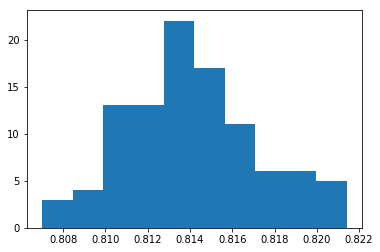

In [75]:
model_accuracies = []

for repetition in range(100):
   (training_inputs,
    testing_inputs,
    training_income,
    testing_income) = train_test_split(all_inputs, all_labels, test_size=0.25)

   decision_tree_classifier = DecisionTreeClassifier()
   decision_tree_classifier.fit(training_inputs, training_income)
   classifier_accuracy = decision_tree_classifier.score(testing_inputs, testing_income)
   model_accuracies.append(classifier_accuracy)

plt.hist(model_accuracies)
;